# 베이스라인 모델링의 중요성

**베이스라인 모델(Baseline Model)은 머신러닝 프로젝트에서 매우 중요한 역할**

- 1. 성능의 기준점 설정
- 2. 모델 개선의 방향성 제시
- 3. 복잡도와 성능의 균형
- 4. 빠른 프로토타이핑과 검증

- 베이스라인 모델링에는 파이캐럿이 젤 많이 쓰인다.

## **1. PyCaret 소개 및 설치**

PyCaret은 Python에서 사용할 수 있는 저코드 머신 러닝 라이브러리

데이터 전처리, 모델 선택, 최적화 및 배포를 쉬운 라이브러리

ml ops(?)

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.4 

In [2]:
# !pip install shap  # pycaret에서 모델 설명에 사용되는 shap
# !pip install pycaret full # 맥
# !pip install pycaret[full] # 윈도우 (안되면 위에껄로)

## **2. 회귀 분석 기초**

회귀 분석은 통계학에서 변수 간의 관계를 모델

선형 회귀는 변수간의 관계가 선형인 경우 (변수의 변화가 다른 변수의 변화에 직선적으로 영향)를 미치는 경우를 가정합니다.

상관계수가 좀 있어야 선형 회귀가 가능하다.

## **3. 데이터셋 로드**

In [ ]:
"""

보스턴 주택 데이터셋 :
미국 보스턴 지역의 주택 가격과 관련한 여러 요소를 포함한 데이터 셋
회귀 분석의 예제

crim: 범죄율
zn: 25,000 평방피트를 초과하는 주거 지역의 비율
indus: 비소매 상업 지역이 차지하는 면적의 비율
chas: 찰스 강에 대한 더미 변수 (강의 경계에 위치하면 1; 그렇지 않으면 0)
nox: 일산화질소 농도 (천만 분의 1)
rm: 주택 당 평균 방 수
age: 1940년 이전에 건축된 소유주택의 비율
dis: 보스턴의 다섯 개 고용 센터까지의 가중 거리
rad: 방사형 고속도로까지의 접근성 지수
tax: 10,000달러당 전체 가치 재산세율
ptratio: 학생-교사 비율
black: 1000(Bk - 0.63)^2, 여기서 Bk는 도시별 흑인 비율
lstat: 인구 중 하위 계층의 비율(%)
medv: 본인 소유의 주택 가격(중앙값) (단위: $1000)
"""

In [5]:
from pycaret.datasets import get_data
data = get_data('boston')
# 여러가지 변수(컬럼)들을 갖고 본인 소유의 주택 가격 중앙값을 예측하는 문제

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 3.1 **PyCaret 전처리**


- 머신러닝의 통상 과정
1. **데이터 클리닝**: 결측치 처리, 이상치 감지 및 제거
2. **특성 공학**: 새로운 특성 생성 및 변환, 비선형 관계를 갖는 변수 변환
3. **데이터 분할**: 훈련 데이터와 테스트 데이터로 분할
4. **정규화/표준화**: 데이터의 스케일 조정
5. **인코딩**: 범주형 변수를 수치형 변수로 변환
6. **다중 공선성 확인**: 변수 간의 고도의 상관관계 분석 및 처리
7. **특성 선택**: 중요한 특성 선택 및 불필요한 특성 제거

# 모델링 시작

In [6]:
from pycaret.regression import *

"""
전처리 단계:

정규화 (normalize=True): 모든 수치형 변수가 동일한 스케일을 갖도록 변환
모델이 특정 변수에 지나치게 의존하지 않도록 하며, 특히 거리 기반 알고리즘에서 중요

데이터 변환 (transformation=True): 데이터의 분포를 더 정규 분포와 유사하게 만듭니다
많은 기계 학습 모델이 데이터가 정규 분포를 따른다고 가정하기 때문에 중요할수 있음

이상치 제거 (remove_outliers=True): 데이터에서 이상치를 자동으로 감지하고 제거
이상치는 모델의 성능에 부정적인 영향을 있을수 있음.

다중 공선성 제거 (remove_multicollinearity=True): 높은 상관관계를 가진
독립 변수들 사이에서 다중 공선성 문제를 해결합니다.
multicollinearity_threshold=0.9는 변수 간의 상관계수가
이 값보다 높으면 한 변수를 제거함을 의미합니다.

특성 선택 (feature_selection=True):
모델의 성능에 긍정적인 영향을 미치는 특성들을 자동으로 선택합니다.
불필요한 특성을 제거하여 모델의 복잡성을 줄이고,
과적합을 방지하는 데 도움이 됩니다.
"""

In [ ]:
s = setup(data=data,target='medv',session_id=123,
          normalize=True, #정규화
          transformation=True, #정규 분포로 데이터 변환
          remove_outliers=True, #이상치 제거
          remove_multicollinearity=True, #다중공선성 처리
          multicollinearity_threshold=0.9,
          feature_selection=True) # 특성 선택

In [7]:
s = setup(data=data,target='medv',session_id=123)

,Description,Value
0,Session id,123
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


# 전처리된 데이터 접근

In [9]:
s.train_transformed

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.799999,4.3665,3.0,223.0,18.600000,390.769989,6.58,35.200001
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.100000,6.8147,4.0,243.0,16.799999,396.899994,5.28,25.000000
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.200001,2.5979,3.0,193.0,17.799999,396.899994,9.45,36.200001
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.800003,2.3682,24.0,666.0,20.200001,385.089996,17.27,16.100000
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.099998,1.5192,24.0,666.0,20.200001,396.899994,21.08,10.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.900002,3.4952,2.0,276.0,18.000000,393.529999,3.57,43.799999
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.599998,2.3053,24.0,666.0,20.200001,396.209991,18.68,16.700001
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.900002,4.7211,5.0,287.0,19.600000,396.899994,7.70,20.400000
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.000000,1.5804,24.0,666.0,20.200001,396.899994,23.60,11.300000


"""
Session id: 세션 식별자로, 123입니다. PyCaret 세션을 유일하게 식별하는 데 사용되며, 재현 가능한 결과를 위해 설정됩니다.

Target: 타겟 변수의 이름으로, medv입니다. 모델이 예측하려고 하는 변수입니다.

Target type: 타겟 변수의 유형으로, 여기서는 Regression입니다. 즉, 문제는 회귀 분석입니다.

Original data shape: 원본 데이터의 형태로, (506, 14)입니다. 506개의 샘플과 14개의 특성이 있음을 의미합니다.

Transformed data shape: 전처리 후 데이터의 형태로, (488, 3)입니다. 데이터 전처리 과정에서 일부 데이터가 제거되거나 변형되었음을 나타냄.

Transformed train set shape: 전처리된 훈련 데이터 세트의 형태로, (336, 3)입니다.

Transformed test set shape: 전처리된 테스트 데이터 세트의 형태로, (152, 3)입니다.

Numeric features: 수치형 특성의 수로, 13개입니다.

Preprocess: 데이터 전처리가 활성화되었는지 나타내며, True입니다.

Imputation type: 결측치 대체 유형으로, simple입니다.

Numeric imputation: 수치형 특성의 결측치를 평균(mean)값으로 대체합니다.

Categorical imputation: 범주형 특성의 결측치를 최빈값(mode)으로 대체합니다.

Remove multicollinearity: 다중공선성 제거 여부로, True입니다. 다중공선성이 높은 특성들은 제거됩니다.

Multicollinearity threshold: 다중공선성 임계값으로, 0.9입니다. 상관 계수가 이 값 이상인 특성들은 제거됩니다.

Remove outliers: 이상치 제거 여부로, True입니다.

Outliers threshold: 이상치 판별 임계값으로, 0.05입니다.

Transformation: 데이터 변환 여부로, True입니다. 비선형 관계를 선형 관계로 변환합니다.

Transformation method: 데이터 변환 방법으로, yeo-johnson입니다.

Normalize: 데이터 정규화 여부로, True입니다.

Normalize method: 정규화 방법으로, zscore입니다.

Feature selection: 특성 선택 여부로, True입니다. 모델의 성능을 높이기 위해 중요한 특성들만 선택합니다.

Feature selection method: 특성 선택 방법으로, classic입니다.

Feature selection estimator: 특성 선택에 사용된 추정기로, lightgbm입니다.

Number of features selected: 선택된 특성의 비율로, 0.2입니다. 전체 특성의 20%만 선택됩니다.

Fold Generator: 교차 검증에서 사용된 폴드 생성기로, KFold입니다.

Fold Number: 교차 검증의 폴드 수로, 10입니다.

CPU Jobs: 동시에 실행할 작업의 수로, -1은 가능한 모든 CPU 코어를 사용함을 의미합니다.

Use GPU: GPU 사용 여부로, False입니다.

Log Experiment: 실험 로깅 여부로, False입니다.

Experiment Name: 실험 이름으로, reg-default-name입니다.

USI: 고유 세션 식별자로, 9562입니다.

"""

## **4. 모델 비교 및 선택**

PyCaret을 사용하면 다양한 모델을 쉽게 비교하여 가장 성능이 좋은 모델을 선택할 수 있습니다.

**`compare_models()`** 함수를 통해 자동으로 여러 회귀 모델을 훈련시키고 그 결과를 비교

In [8]:
best_model = compare_models()
# 제일 성능이 좋은 모델을 알려준다.
# 여기에서 r2 값 튜닝하여 더 좋게 만들고 싶다.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0378,9.4958,2.9283,0.8884,0.1298,0.1000,0.3220
gbr,Gradient Boosting Regressor,2.1748,9.6803,3.0274,0.8788,0.1434,0.1117,0.2350
rf,Random Forest Regressor,2.2316,10.6310,3.1448,0.8673,0.1447,0.1129,0.3040
lightgbm,Light Gradient Boosting Machine,2.3305,11.5722,3.2969,0.8566,0.1482,0.1157,0.3540
xgboost,Extreme Gradient Boosting,2.4154,12.5225,3.4385,0.8452,0.1539,0.1196,0.1650
ada,AdaBoost Regressor,2.8789,15.9344,3.8667,0.8055,0.1803,0.1517,0.1150
dt,Decision Tree Regressor,2.9307,19.6150,4.2538,0.7368,0.1909,0.1455,0.0240
ridge,Ridge Regression,3.2793,22.8402,4.6440,0.7300,0.2460,0.1664,0.0240
lr,Linear Regression,3.3006,22.7209,4.6402,0.7295,0.2526,0.1668,0.7710
br,Bayesian Ridge,3.3158,23.2769,4.6862,0.7258,0.2453,0.1673,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## 모델 성과 지표
"""
MAE (Mean Absolute Error): 평균 절대 오차는 예측값과 실제값 사이의 절대 차이의 평균
모든 예측 오차의 절대값을 더한 다음, 샘플의 수로 나누어 계산합니다.
MAE는 오차의 크기를 직관적으로 이해하기 쉬운 지표입니다.

MSE (Mean Squared Error): 평균 제곱 오차는 예측값과 실제값 사이의 차이를 제곱한 값들의 평균
MSE는 큰 오차에 더 큰 가중치를 주기 때문에,
모델이 큰 오차를 만들었을 때 그 영향을 강조합니다.

RMSE (Root Mean Squared Error):
평균 제곱근 오차는 MSE의 제곱근으로, 예측값과 실제값의 차이를 제곱하여 평균 낸 후, 그 제곱근을 취한 값입니다.
RMSE는 MSE와 마찬가지로 큰 오차에 더 큰 가중치를 주며,
오차의 단위가 원래 데이터의 단위와 동일하다는 장점

R2 (R-squared):
결정 계수라고도 하며, 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다.
R2 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명한다고 볼 수 있습니다.

RMSLE (Root Mean Squared Logarithmic Error):
평균 제곱로그 오차의 제곱근입니다. 이 지표는 오차를 로그 스케일로 변환하여 계산하기 때문에,
큰 오차와 작은 오차 사이의 상대적 차이를 강조하는 특징이 있습니다.
주로 큰 값의 범위를 다룰 때 유용합니다.

MAPE (Mean Absolute Percentage Error):
평균 절대 백분율 오차는 실제 값과 예측 값의 차이를 절대값으로 변환한 다음,
실제 값으로 나누어 백분율로 표현한 값들의 평균입니다.
MAPE는 오차가 실제 값에 대한 백분율로 표현되기 때문에, 결과의 해석이 용이.

"""

## **5. 자동 하이퍼파라미터 튜닝 (Auto-tuning)**

선택한 모델의 성능을 더욱 향상시키기 위해 PyCaret의 **`tune_model`** 함수를 사용하여 자동 하이퍼파라미터 튜닝을 진행해보겠습니다.

이 과정은 모델의 성능을 최적화하는 데 도움을 줍니다.

In [10]:
tuned_model = tune_model(best_model,optimize='R2')
# r2 스코어가 0.8884에서 오른 것들 찾기. 가장 높게 나온 모델이 tuned 모델로 저장된 것.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6595,13.4674,3.6698,0.8493,0.1394,0.0988
1,1.9068,6.7518,2.5984,0.8542,0.1191,0.1022
2,2.5426,9.5300,3.0871,0.9048,0.1732,0.1542
3,3.0106,23.9678,4.8957,0.7637,0.2017,0.1597
4,2.5438,10.9426,3.3080,0.9072,0.1524,0.1308
5,2.2067,9.1330,3.0221,0.8301,0.1552,0.1207
6,1.6454,4.2093,2.0517,0.9376,0.0933,0.0788
7,3.0894,34.0583,5.8359,0.6875,0.2059,0.1324
8,2.0147,6.7065,2.5897,0.8801,0.1588,0.1282


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## **6. 모델 분석 및 시각화**

선택하고 튜닝한 모델을 더 깊이 분석하고, 다양한 시각화 기능을 사용하여 모델의 성능을 평가.

PyCaret은 잔차 분석, 오류 분석 및 특성 중요도 평가와 같은 여러 시각화 옵션을 제공합니다.

In [11]:
import matplotlib.pyplot as plt

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

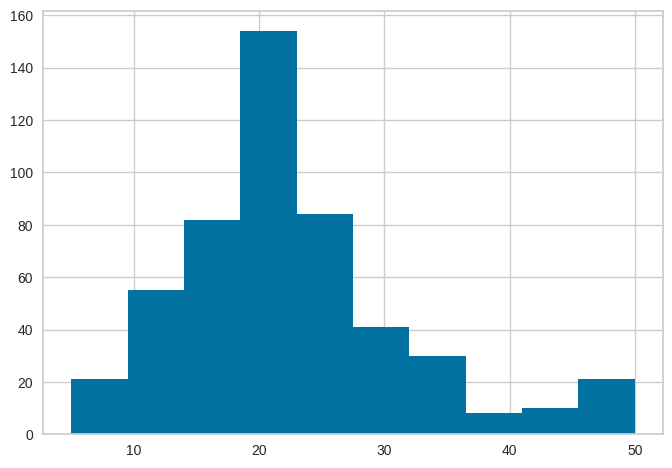

In [12]:
# histogram
plt.hist(data['medv'])

1. Residuals Plot (잔차 그래프)
사용법: plot_model(your_model, plot = 'residuals')
해석: 잔차 그래프는 예측값과 실제값의 차이(잔차)를 보여줍니다.
잔차가 무작위로 분포하고, 특정 패턴이 없어야 모델이 데이터의 패턴을 잘 학습했다고 볼 수 있습니다.
특정 패턴이나 구조가 보인다면, 모델이 데이터의 일부 패턴을 잡아내지 못했거나, 데이터에 비선형성이 있을 수 있음을 의미

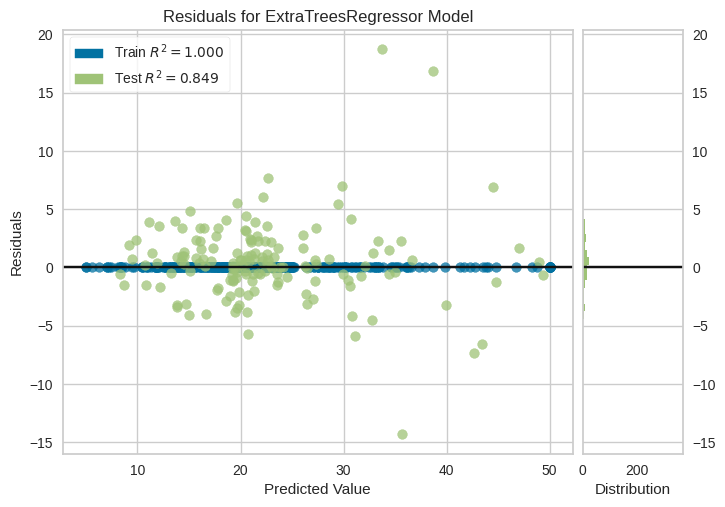

In [13]:
plot_model(tuned_model, plot = 'residuals')
# 잔차 그림

2. Error Plot (오차 그래프)
사용법: plot_model(your_model, plot = 'error')
해석: 오차 그래프는 모델의 예측 오차를 시각화합니다.
일반적으로 예측값 대비 실제값의 오차를 보여주며, 잔차 분포의 특성을 파악하는 데 도움이 됩니다.

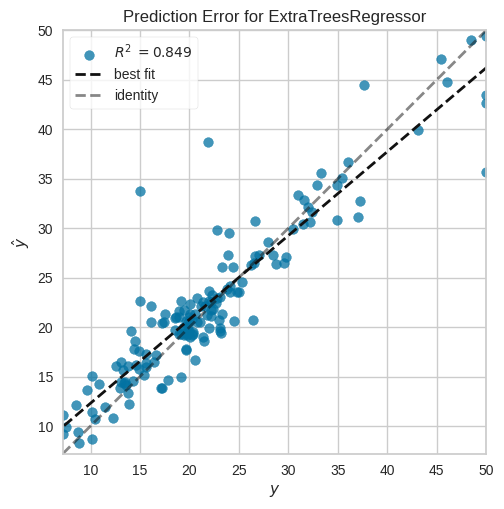

In [14]:
plot_model(tuned_model, plot = 'error')
# 실제값과 예측값 차이를 보여줘

- 지금까지의 과정은 보편적으로 해야하는 것만 해놓은 튜닝
- 더 성능을 높이기 위해 제어를 하게 튜닝해가면 된다.

## **8. 최종 모델 평가 및 해석**

최종적으로, 모델을 사용하여 예측을 수행하고 결과를 해석합니다.

로운 데이터에 대한 예측을 쉽게 수행할 수 있으며, 이를 통해 모델의 성능을 실제 상황에서 평가할 수 있습니다.

In [15]:
new_data = data

In [16]:
final_predictions = predict_model(tuned_model, data=new_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6746,3.6597,1.9130,0.9566,0.0828,0.0356
